In [41]:
import pandas as pd
import time
import scraping
import constants
import os
import numpy as np
import re
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from seaborn import plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import train_test_split
from sklearn.cross_validation  import KFold
from sklearn import preprocessing

In [10]:
df = pd.read_csv('data/data.csv', index_col=0)

In [11]:
%matplotlib inline
# Not enough data on these features
df = df.drop(['orb', 'tov', 'pf'], axis=1)

In [12]:
df['per'] = pd.to_numeric(df['per'], errors='force')

In [13]:
df.loc[df.weight_lb.str.isnumeric() == False, 'weight_lb'] = np.nan

In [14]:
df.weight_lb = pd.to_numeric(df.weight_lb,errors='ignore')

In [15]:
df.loc[(df.height_in==0), 'height_in'] = np.nan
df.loc[(df.wingspan_in==0), 'wingspan_in'] = np.nan
df.loc[(df.reach_in==0), 'reach_in'] = np.nan

In [18]:
# PER above 30 is not possible.
df[df.per > 30] = np.nan
df = df.loc[df.draft_year<2016]

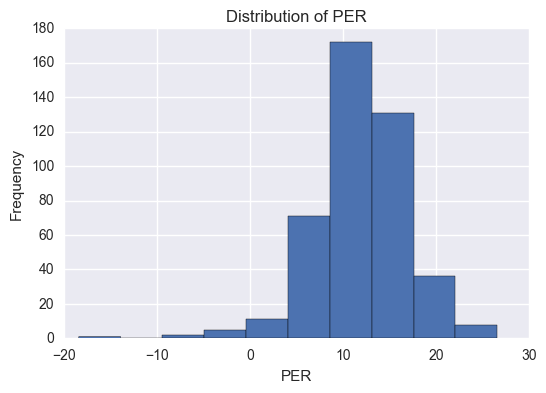

In [40]:
fig,ax = plt.subplots(1,1)
plt.hist(df.per)
plt.xlabel('PER')
plt.ylabel('Frequency')
plt.title('Distribution of PER')

# I am interested to see the features that are related with a player's PER.
- PER is a statistic measure used to evaluate the efficience of an nba player.
- You can see that most players fall on the low 10s.
- Only a small proportion of players have PER > 20

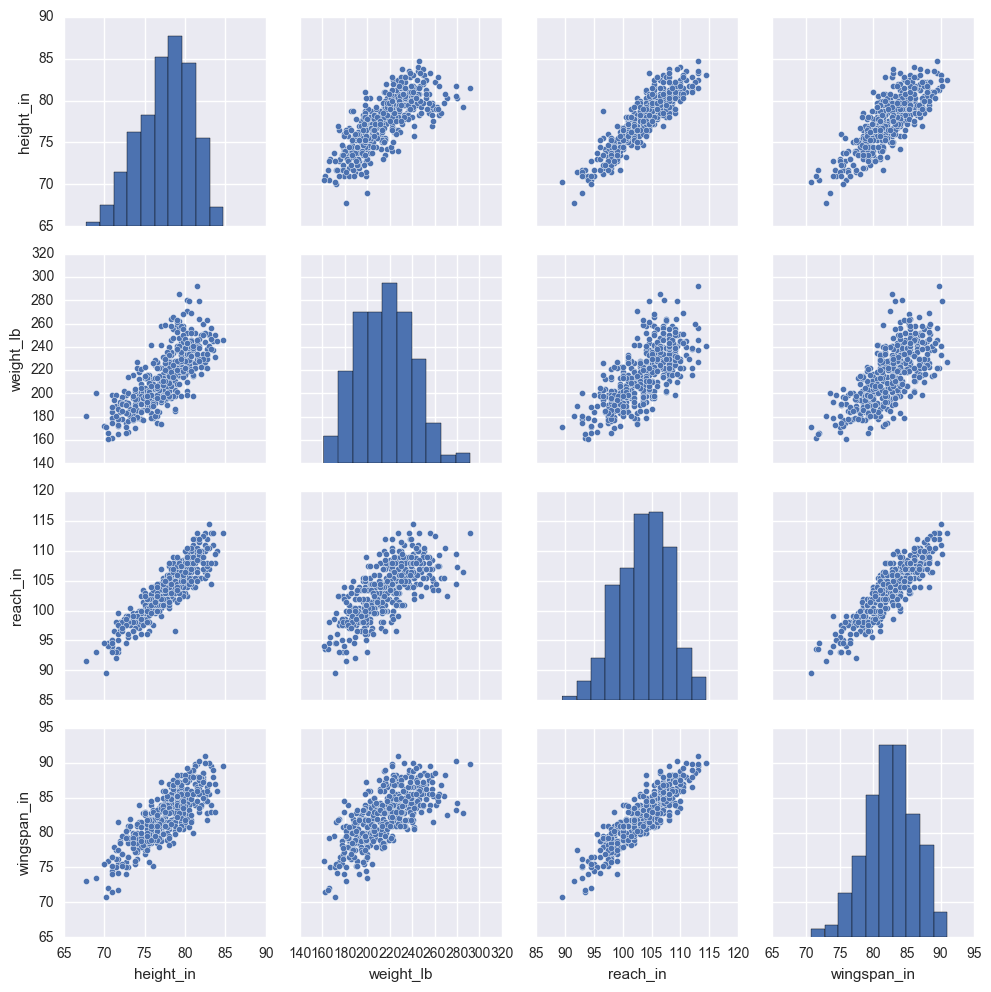

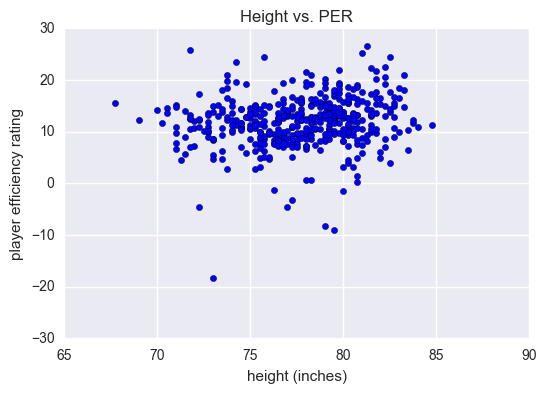

In [50]:

sns.pairplot(df[['height_in', 'weight_lb', 'reach_in', 'wingspan_in']])

fig,ax = plt.subplots(1,1)
ax.scatter(df.height_in, df.per, label='PER')
ax.set_xlabel('height (inches)')
ax.set_ylabel('player efficiency rating')
ax.set_title('Height vs. PER')

# Body measurements
- We can see strong correlations with all of the body measurements. Height seems to correlate with weight, reach, and wingspan. This is very much expected.
- However, we can see from the second diagram, the scatter plot, that height does not have a strong correlation with PER. 
- Body measurements, seems to be distributed in terms of PER. Perhaps skill statistics (shooting, defense, etc) are better features.

In [51]:
df = df.dropna()

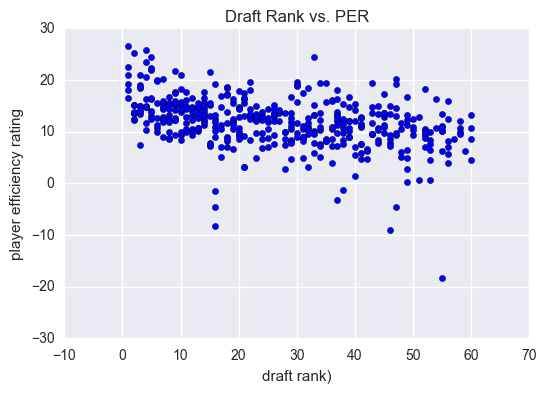

In [43]:
fig,ax = plt.subplots(1,1)
ax.scatter(df.draft_rank, df.per, label='PER')
ax.set_xlabel('draft rank)')
ax.set_ylabel('player efficiency rating')
ax.set_title('Draft Rank vs. PER')

# Draft rank
- Draft rank is one of the best indicators of how good a player is. Better players are ranked first. 
- In the past, star players are ranked first (Lebron James, Tim Duncan, Michael Jordan, etc.)
- However, it can be seen that the correlation is not that strong, which is interesting. It suggests that even though you are deemed to be the most successful player during the nba draft, you may not be as successful as projected in the NBA.

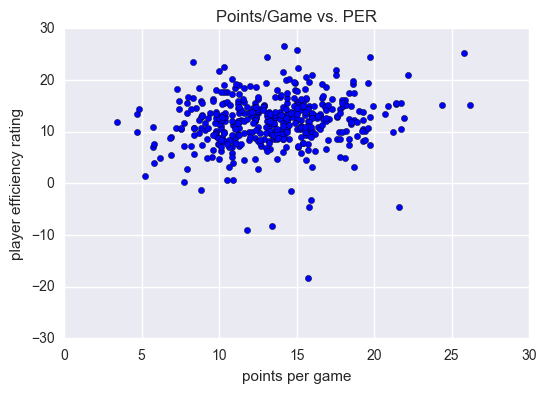

In [54]:
fig,ax = plt.subplots(1,1)
ax.scatter(df.pts_per_g, df.per, label='PER')
ax.set_xlabel('points per game')
ax.set_ylabel('player efficiency rating')
ax.set_title('Points/Game vs. PER')